# Lab Week 5 & 6: R General Election Assignment
### Stephen Alger
### C16377163
### February/ March 2020


In [239]:
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//RtmplAsF48/downloaded_packages


In [241]:
library(dplyr)

### Part 1: Load Files...

In [242]:
# Set File Locations
CandidateFilelocation = "/Users/stephen2697/Desktop/DataVis-Lab5CSV/candidate-details.csv"
ConstituencyFilelocation = "/Users/stephen2697/Desktop/DataVis-Lab5CSV/constituency-details.csv"
CountFilelocation = "/Users/stephen2697/Desktop/DataVis-Lab5CSV/count-details.csv"

# Create the data frames.
canddf <- read.csv(CandidateFilelocation, sep = ",", fileEncoding="latin1")
constdf <- read.csv(ConstituencyFilelocation, sep = ",", fileEncoding="latin1")
countdf <- read.csv(CountFilelocation, sep = ",", fileEncoding="latin1")

print("Input CSV Files Read")

[1] "Input CSV Files Read"


### Part 2: 
Using the candidate csv, load the data into a data frame called canddf (Please note, because of the accents (e.g. Eamon Ó Cuiv), you will need to use a latin1 file encoding). Check if you need to change anything else.

In [243]:
#Part 2a: Display the Surname and First.Name of candidates from the Wexford constituency in canddf.
#Note Result column has nan values
#print(canddf)

wexFirstSecondNames <- subset(canddf, select = c("Constituency","Surname", "First.Name"), Constituency == "Wexford")
print(wexFirstSecondNames)
summary(wexFirstSecondNames)

    Constituency Surname First.Name
32       Wexford  Browne      James
44       Wexford   Byrne      Aoife
47       Wexford   Byrne    Malcolm
59       Wexford  Carthy        Ger
115      Wexford  D'arcy    Michael
144      Wexford   Dwyer       John
180      Wexford    Foxe   Caroline
234      Wexford   Hogan      Julie
241      Wexford  Howlin    Brendan
257      Wexford   Kehoe       Paul
263      Wexford   Kelly    Leonard
286      Wexford   Lloyd      David
303      Wexford Maloney      David
382      Wexford  Mythen       John
535      Wexford Wadding    Deirdre
538      Wexford Wallace       Mick
539      Wexford   Walsh        Ann


             Constituency    Surname      First.Name
 Wexford           :17    Byrne  : 2   David   :2   
 Carlow-Kilkenny   : 0    Browne : 1   John    :2   
 Cavan-Monaghan    : 0    Carthy : 1   Ann     :1   
 Clare             : 0    D'arcy : 1   Aoife   :1   
 Cork  East        : 0    Dwyer  : 1   Brendan :1   
 Cork North-Central: 0    Foxe   : 1   Caroline:1   
 (Other)           : 0    (Other):10   (Other) :9   

In [244]:
#Part 2b: How many candidates are there in the Laois constituency in canddf?

numberOfLaoisCandidatesCandDF <- subset(canddf, Constituency == "Laois")
output <- cat("There are:", length(numberOfLaoisCandidates), "Laois Candidates in the canddf source\n")
print(output)

There are: 14 Laois Candidates in the canddf source
NULL


In [245]:
#Part 2c: How many constituencies are there in canddf?
numberConstituenciesCandDF <- unique(canddf$Constituency)
output <- cat("There are:", length(numberConstituenciesCandDF), "Constituencies in the canddf source\n")
print(output)

There are: 40 Constituencies in the canddf source
NULL


### Part 3: 
How many constituencies are there in this source?

In [246]:
#print(constdf)
numberConstituenciesConstDF <- unique(constdf$Constituency.Name)
output <- cat("There are:", length(numberConstituenciesConstDF), "Constituencies in the constdf source","\n")
print(output)


There are: 40 Constituencies in the constdf source 
NULL


### Part 4:
Assuming the constituency source is correct, look at the data and make a decision about any inconsistencies.

In [247]:
#Inconsistencies:
#Remove Hypenation in CandDF
canddf$Constituency <- mapply(gsub, pattern = "-", replacement = " ", canddf$Constituency)

In [248]:
print(unique(canddf$Constituency))
print(unique(constdf$Constituency.Name)) 

 [1] "Galway West"          "Louth"                "Cork  East"          
 [4] "Waterford"            "Dublin Mid West"      "Tipperary"           
 [7] "Dublin Bay South"     "Dublin South Central" "Carlow Kilkenny"     
[10] "Dún Laoghaire"        "Longford Westmeath"   "Cork North Central"  
[13] "Wicklow"              "Kildare North"        "Limerick City"       
[16] "Cork South Central"   "Meath East"           "Offaly"              
[19] "Kerry"                "Sligo Leitrim"        "Clare"               
[22] "Dublin South West"    "Dublin Bay North"     "Wexford"             
[25] "Limerick County"      "Dublin Central"       "Dublin West"         
[28] "Meath West"           "Cavan Monaghan"       "Mayo"                
[31] "Galway East"          "Dublin North West"    "Dublin Fingal"       
[34] "Cork South West"      "Roscommon Galway"     "Cork North West"     
[37] "Laois"                "Kildare South"        "Dublin Rathdown"     
[40] "Donegal"             
 [1] Carlo

In [249]:
#Column Naming in ConstDF is different naming
#CAND HEADINGS: Constituency
#CONST HEADINGS: Constituency Name
#Fix
colnames(canddf)[colnames(canddf) == 'Constituency'] <- 'Constituency.Name'
colnames(canddf)
colnames(constdf)

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Gender"                  
 [5] "Party"                    "Party.Abbreviation"      
 [7] "Count.Number"             "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Votes"                   
[11] "Result"                   "Candidate.Id"            
[13] "Constituency.Number"      "Constituency.Ainm"

[1] "Constituency.Name"     "Constituency.Ainm"     "Count.Number"         
 [4] "Date.Of.Election"      "Number.Of.Candidates"  "Number.of.Seats"      
 [7] "Quota"                 "Required.Save.Deposit" "Seats.Filled"         
[10] "Seats.in.Constituency" "Spoiled"               "Total.Electorate"     
[13] "Total.Poll"            "Valid.Poll"            "Constituency.Number"

### Part 5:
Using the count csv, load the data into a data frame called countdf.
How many candidates are there in the Laois constituency according to countdf?

In [250]:
numberOfLaoisCandidatesCountDF <- subset(countdf, Constituency.Name == "Laois")
output <- cat("There are:", length(numberOfLaoisCandidatesCountDF), "Laois Candidates in the countdf source\n")
print(output)

There are: 14 Laois Candidates in the countdf source
NULL


### Part 6:
Check the constituency data for consistency with the new count data. If you find inconsistencies, make a decision on how you will handle them. 
(Check countDF vs constDF in constituency data).

In [251]:
#Cant find an issue

print("Both have correct Column names")
colnames(countdf)
colnames(constdf)

summary(constdf$Constituency.Name)
summary(countdf$Constituency.Name)

print("Both Have correct constituency counts")
length(unique(constdf$Constituency.Name))
length(unique(countdf$Constituency.Name))

print("Check Sample of both")
head(constdf)
head(countdf)

print("Correct Corresponding Constituency Numbers")
checkSample1 <- subset(constdf, select = c("Constituency.Name", "Constituency.Number"), Constituency.Name == "Louth")
checkSample2 <- subset(countdf, select = c("Constituency.Name", "Constituency.Number"), Constituency.Name == "Louth")
print(checkSample1)
print(checkSample2)

[1] "Both have correct Column names"


[1] "Constituency.Name"        "Candidate.surname"       
 [3] "Candidate.First.Name"     "Result"                  
 [5] "Count.Number"             "Non_Transferable"        
 [7] "Occurred.On.Count"        "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Transfers"               
[11] "Votes"                    "Total.Votes"             
[13] "Constituency.Number"      "Candidate.Id"

[1] "Constituency.Name"     "Constituency.Ainm"     "Count.Number"         
 [4] "Date.Of.Election"      "Number.Of.Candidates"  "Number.of.Seats"      
 [7] "Quota"                 "Required.Save.Deposit" "Seats.Filled"         
[10] "Seats.in.Constituency" "Spoiled"               "Total.Electorate"     
[13] "Total.Poll"            "Valid.Poll"            "Constituency.Number"

Carlow Kilkenny       Cavan Monaghan                Clare 
                   1                    1                    1 
           Cork East   Cork North Central      Cork North West 
                   1                    1                    1 
  Cork South Central      Cork South West              Donegal 
                   1                    1                    1 
    Dublin Bay North     Dublin Bay South       Dublin Central 
                   1                    1                    1 
       Dublin Fingal      Dublin Mid West    Dublin North West 
                   1                    1                    1 
     Dublin Rathdown Dublin South Central    Dublin South West 
                   1                    1                    1 
         Dublin West        Dún Laoghaire          Galway East 
                   1                    1                    1 
         Galway West                Kerry        Kildare North 
                   1                    1                    1 
       Kildare South                Laois        Limerick City 
                   1                    1                    1 
     Limerick County   Longford Westmeath                Louth 
                   1                    1                    1 
                Mayo           Meath East           Meath West 
                   1                    1                    1 
              Offaly     Roscommon Galway        Sligo Leitrim 
                   1                    1                    1 
           Tipperary            Waterford              Wexford 
                   1                    1                    1 
             Wicklow 
                   1

Carlow Kilkenny       Cavan Monaghan                Clare 
                 165                  150                  192 
           Cork East   Cork North Central      Cork North West 
                 150                  154                  117 
  Cork South Central      Cork South West              Donegal 
                 165                   55                  208 
    Dublin Bay North     Dublin Bay South       Dublin Central 
                 300                  112                  165 
       Dublin Fingal      Dublin Mid West    Dublin North West 
                 150                  180                   99 
     Dublin Rathdown Dublin South Central    Dublin South West 
                  54                  143                  336 
         Dublin West        Dún Laoghaire          Galway East 
                  55                   77                   70 
         Galway West                Kerry        Kildare North 
                 280                  176                  126 
       Kildare South                Laois        Limerick City 
                  54                   18                   66 
     Limerick County   Longford Westmeath                Louth 
                  60                  270                  176 
                Mayo           Meath East           Meath West 
                 160                  108                   54 
              Offaly     Roscommon Galway        Sligo Leitrim 
                  77                   96                  270 
           Tipperary            Waterford              Wexford 
                  91                  108                  238 
             Wicklow 
                 160

[1] "Both Have correct constituency counts"


[1] 40

[1] 40

[1] "Check Sample of both"


,Constituency.Name,Constituency.Ainm,Count.Number,Date.Of.Election,Number.Of.Candidates,Number.of.Seats,Quota,Required.Save.Deposit,Seats.Filled,Seats.in.Constituency,Spoiled,Total.Electorate,Total.Poll,Valid.Poll,Constituency.Number
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Carlow Kilkenny,Ceatharlach-Cill Chainnigh,11,26/02/2016,15,5,11669,2918,5,5,505,107023,70514,70009,1
2,Cavan Monaghan,An Cabhán-Muineachán,10,26/02/2016,15,4,11931,2983,4,4,598,90618,60248,59650,2
3,Clare,An Clár,12,26/02/2016,16,4,11401,2851,4,4,407,83660,57407,57000,3
4,Cork East,Corcaigh Thoir,10,26/02/2016,15,4,10562,2641,4,4,445,83236,53251,52806,4
5,Cork North Central,Corcaigh Thuaidh-Lár,11,26/02/2016,14,4,10235,2559,4,4,516,81609,51690,51174,5
6,Cork North West,Corcaigh Thiar Thuaidh,9,26/02/2016,13,3,11740,2936,3,3,395,67589,47353,46958,6


,Constituency.Name,Candidate.surname,Candidate.First.Name,Result,Count.Number,Non_Transferable,Occurred.On.Count,Required.To.Reach.Quota,Required.To.Save.Deposit,Transfers,Votes,Total.Votes,Constituency.Number,Candidate.Id
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Louth,Adams,Gerry,,1,0,0,594,0,0,10661,10661,31,160
2,Louth,Adams,Gerry,,2,0,0,481,0,113,10661,10774,31,160
3,Louth,Adams,Gerry,,3,0,0,429,0,52,10661,10826,31,160
4,Louth,Adams,Gerry,,4,0,0,347,0,82,10661,10908,31,160
5,Louth,Adams,Gerry,,5,0,0,159,0,188,10661,11096,31,160
6,Louth,Adams,Gerry,Elected,7,0,6,0,0,0,10661,11278,31,160


[1] "Correct Corresponding Constituency Numbers"
   Constituency.Name Constituency.Number
30             Louth                  31
     Constituency.Name Constituency.Number
1                Louth                  31
2                Louth                  31
3                Louth                  31
4                Louth                  31
5                Louth                  31
6                Louth                  31
7                Louth                  31
8                Louth                  31
9                Louth                  31
10               Louth                  31
11               Louth                  31
192              Louth                  31
193              Louth                  31
194              Louth                  31
195              Louth                  31
196              Louth                  31
197              Louth                  31
198              Louth                  31
199              Louth                  31
200      

### Part 7:
Check the candidate data for consistency with the count data.

In [252]:
#Column Heading Mismatch Fix
#What is should look like:
colnames(canddf)

#Fix
colnames(countdf)[colnames(countdf) == 'Candidate.surname'] <- 'Surname'
colnames(countdf)[colnames(countdf) == 'Candidate.First.Name'] <- 'First.Name'

#Check
colnames(countdf)


[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Gender"                  
 [5] "Party"                    "Party.Abbreviation"      
 [7] "Count.Number"             "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Votes"                   
[11] "Result"                   "Candidate.Id"            
[13] "Constituency.Number"      "Constituency.Ainm"

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Result"                  
 [5] "Count.Number"             "Non_Transferable"        
 [7] "Occurred.On.Count"        "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Transfers"               
[11] "Votes"                    "Total.Votes"             
[13] "Constituency.Number"      "Candidate.Id"

In [253]:
#Check Content
#Seems okay
head(countdf)
head(canddf)

,Constituency.Name,Surname,First.Name,Result,Count.Number,Non_Transferable,Occurred.On.Count,Required.To.Reach.Quota,Required.To.Save.Deposit,Transfers,Votes,Total.Votes,Constituency.Number,Candidate.Id
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Louth,Adams,Gerry,,1,0,0,594,0,0,10661,10661,31,160
2,Louth,Adams,Gerry,,2,0,0,481,0,113,10661,10774,31,160
3,Louth,Adams,Gerry,,3,0,0,429,0,52,10661,10826,31,160
4,Louth,Adams,Gerry,,4,0,0,347,0,82,10661,10908,31,160
5,Louth,Adams,Gerry,,5,0,0,159,0,188,10661,11096,31,160
6,Louth,Adams,Gerry,Elected,7,0,6,0,0,0,10661,11278,31,160


,Constituency.Name,Surname,First.Name,Gender,Party,Party.Abbreviation,Count.Number,Required.To.Reach.Quota,Required.To.Save.Deposit,Votes,Result,Candidate.Id,Constituency.Number,Constituency.Ainm
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>
1,Galway West,Ó Cuív,Éamon,M,Fianna Fáil,F.F.,14,0,0,9539,Elected,165,23,Gaillimh Thiar
2,Louth,Adams,Gerry,M,Sinn Féin,S.F.,11,0,0,10661,Elected,160,31,Lú
3,Cork East,Ahern,Barbara,F,Fianna Fáil,F.F.,10,3781,0,4594,,169,4,Corcaigh Thoir
4,Waterford,Ahmed,Sheik Mohiuddin,M,Non-Party,NON-P.,9,0,2443,140,Excluded,160,38,Port Lairge
5,Dublin Mid West,Akpoveta,Patrick,M,Non-Party,NON-P.,12,0,1813,288,Excluded,187,643,Baile Átha Cliath Thiar-Meán
6,Tipperary,Ambrose,Siobhán,F,Fianna Fáil,F.F.,7,0,0,4472,Excluded,160,36,Tiobraid Árann


# Week 6
### Merginging Data Fun!

### Part 8. 
Merge the data sources as you see fit, to end up with a new data frame df, 

with columns:Candidate.First.Name, Candidate.surname, Constituency.Name, Constituency.Number, Count.Number, Gender, Number.Of.Candidates, Number.of.Seats, Party.Abbreviation, Party, Quota, Result, Seats.in.Constituency, Total.Votes, Votes

In [273]:
#colnames(canddf)
#colnames(constdf)


mergedDF <- merge(constdf, countdf, by=c("Constituency.Name", "Count.Number", "Constituency.Number"))
#head(mergeddf) 
mergedDF <- merge(canddf, mergedDF, by=c("Constituency.Name", "Surname", "First.Name", "Count.Number", "Constituency.Number", "Constituency.Ainm" , "Required.To.Reach.Quota", "Required.To.Save.Deposit", "Votes", "Result", "Candidate.Id"))
#head(mergeddf) 

colnames(mergedDF)

#Rename As In lab
colnames(mergedDF)[colnames(mergedDF) == 'Surname'] <- 'Candidate.surname'
colnames(mergedDF)[colnames(mergedDF) == 'First.Name'] <- 'Candidate.First.Name'
colnames(mergedDF)

#Drop unneccesary content
mergedDF <- subset(mergedDF, select = c("Candidate.First.Name", "Candidate.surname", "Constituency.Name", "Constituency.Number", "Count.Number", "Gender", "Number.Of.Candidates", "Number.of.Seats", "Party.Abbreviation", "Party", "Quota", "Result", "Seats.in.Constituency", "Total.Votes", "Votes"))

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Count.Number"            
 [5] "Constituency.Number"      "Constituency.Ainm"       
 [7] "Required.To.Reach.Quota"  "Required.To.Save.Deposit"
 [9] "Votes"                    "Result"                  
[11] "Candidate.Id"             "Gender"                  
[13] "Party"                    "Party.Abbreviation"      
[15] "Date.Of.Election"         "Number.Of.Candidates"    
[17] "Number.of.Seats"          "Quota"                   
[19] "Required.Save.Deposit"    "Seats.Filled"            
[21] "Seats.in.Constituency"    "Spoiled"                 
[23] "Total.Electorate"         "Total.Poll"              
[25] "Valid.Poll"               "Non_Transferable"        
[27] "Occurred.On.Count"        "Transfers"               
[29] "Total.Votes"

[1] "Constituency.Name"        "Candidate.surname"       
 [3] "Candidate.First.Name"     "Count.Number"            
 [5] "Constituency.Number"      "Constituency.Ainm"       
 [7] "Required.To.Reach.Quota"  "Required.To.Save.Deposit"
 [9] "Votes"                    "Result"                  
[11] "Candidate.Id"             "Gender"                  
[13] "Party"                    "Party.Abbreviation"      
[15] "Date.Of.Election"         "Number.Of.Candidates"    
[17] "Number.of.Seats"          "Quota"                   
[19] "Required.Save.Deposit"    "Seats.Filled"            
[21] "Seats.in.Constituency"    "Spoiled"                 
[23] "Total.Electorate"         "Total.Poll"              
[25] "Valid.Poll"               "Non_Transferable"        
[27] "Occurred.On.Count"        "Transfers"               
[29] "Total.Votes"

### Part 9. 
Write a function that takes a parameter of the constituency name and returns a dataframe with the candidate’s first and surnames, the constituency name, gender, party and party abbreviation for all elected candidates in that constituency.

In [301]:
getEelectedCandidates <- function(constName){
    
    electedCandidate <- filter(mergedDF, Constituency.Name == constName)
    electedCandidate <- filter(electedCandidate, Result == "Elected")
    
    electedCandidate <- subset(electedCandidate, select = c("Candidate.First.Name", "Candidate.surname", "Constituency.Name", "Gender", "Party", "Party.Abbreviation"))
    
    return(electedCandidate)
}

### Part 10a.
Using df, create plots to show the solutions to the following:
In a constituency (pick one), show the spread of elected candidates across
the parties.



  Candidate.First.Name Candidate.surname Constituency.Name Gender       Party
1                Gerry             Adams             Louth      M   Sinn Féin
2               Declan        Breathnach             Louth      M Fianna Fáil
3                Peter       Fitzpatrick             Louth      M   Fine Gael
4               Imelda           Munster             Louth      F   Sinn Féin
5               Fergus            O'Dowd             Louth      M   Fine Gael
  Party.Abbreviation
1               S.F.
2               F.F.
3               F.G.
4               S.F.
5               F.G.


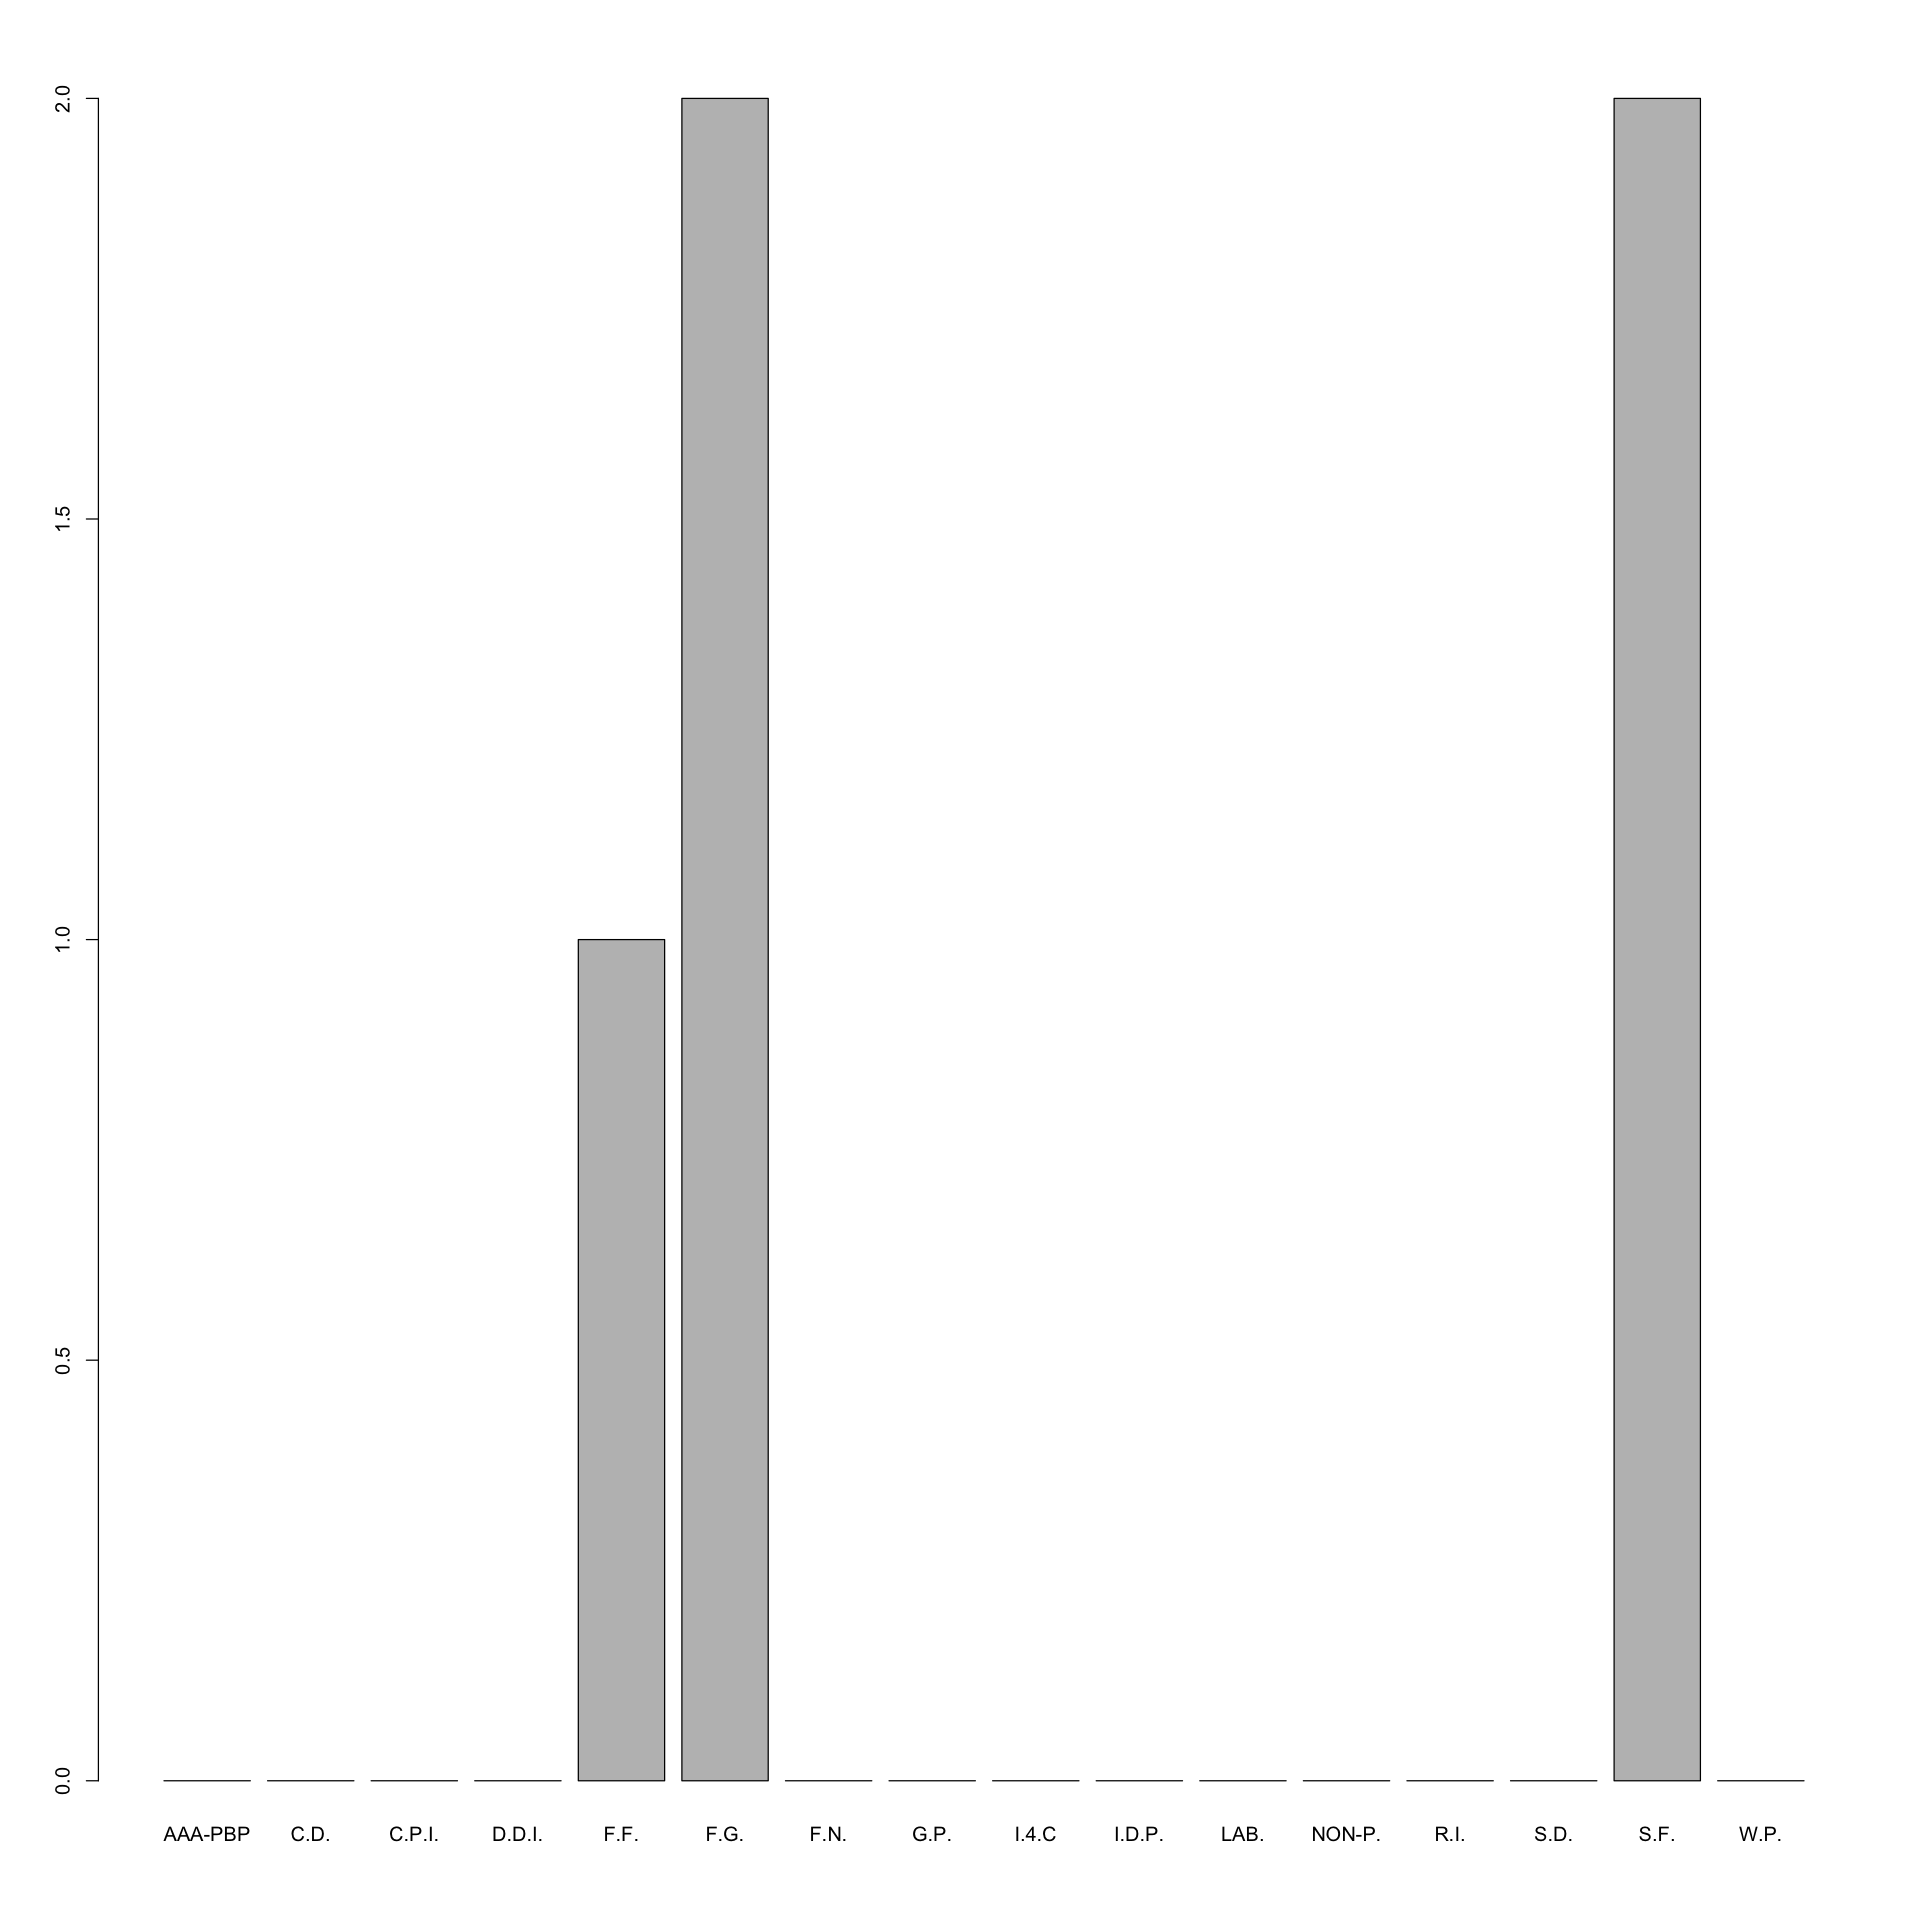

In [302]:
louthElectedCandidates <- getEelectedCandidates("Louth")
print(louthElectedCandidates)
options(repr.plot.width=16, repr.plot.height=16)
plot(louthElectedCandidates$Party.Abbreviation)

### Part 10B: 
Treating the top 5 parties as individual parties and the remaining parties as ‘other’, repeat the exercise from part a.

In [ ]:
#Not great solution.

In [303]:
#louthElectedCandidatesTop5 <- louthElectedCandidates[rev(order(louthElectedCandidates$Party)),"Party.Abbreviation"][1:2]

In [309]:

    top5 = louthElectedCandidates
    print(top5)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "AAA-PBP", replacement = "Main", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "F.F.", replacement = "Main", top5$Party.Abbreviation)
    

    
    top5$Party.Abbreviation <- mapply(gsub, pattern = "F.G.", replacement = "Main", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "NON-P", replacement = "Main", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "S.F.", replacement = "Main", top5$Party.Abbreviation)
    
    top5$Party.Abbreviation <- mapply(gsub, pattern = "C.D.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "C.P.I", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "D.D.I", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "G.P.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "I.4.C.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "I.D.P.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "F.N.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "LAB.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "R.I.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "S.D.", replacement = "Other", top5$Party.Abbreviation)
    top5$Party.Abbreviation <- mapply(gsub, pattern = "W.D.", replacement = "Other", top5$Party.Abbreviation)
    print(top5)
#test <- getTop5EelectedCandidates()
#plot(test$Party.Abbreviation)

  Candidate.First.Name Candidate.surname Constituency.Name Gender       Party
1                Gerry             Adams             Louth      M   Sinn Féin
2               Declan        Breathnach             Louth      M Fianna Fáil
3                Peter       Fitzpatrick             Louth      M   Fine Gael
4               Imelda           Munster             Louth      F   Sinn Féin
5               Fergus            O'Dowd             Louth      M   Fine Gael
  Party.Abbreviation
1               S.F.
2               F.F.
3               F.G.
4               S.F.
5               F.G.
  Candidate.First.Name Candidate.surname Constituency.Name Gender       Party
1                Gerry             Adams             Louth      M   Sinn Féin
2               Declan        Breathnach             Louth      M Fianna Fáil
3                Peter       Fitzpatrick             Louth      M   Fine Gael
4               Imelda           Munster             Louth      F   Sinn Féin
5               

### Part 10C:
Across all constituencies, show the number of candidates from each party that was elected.

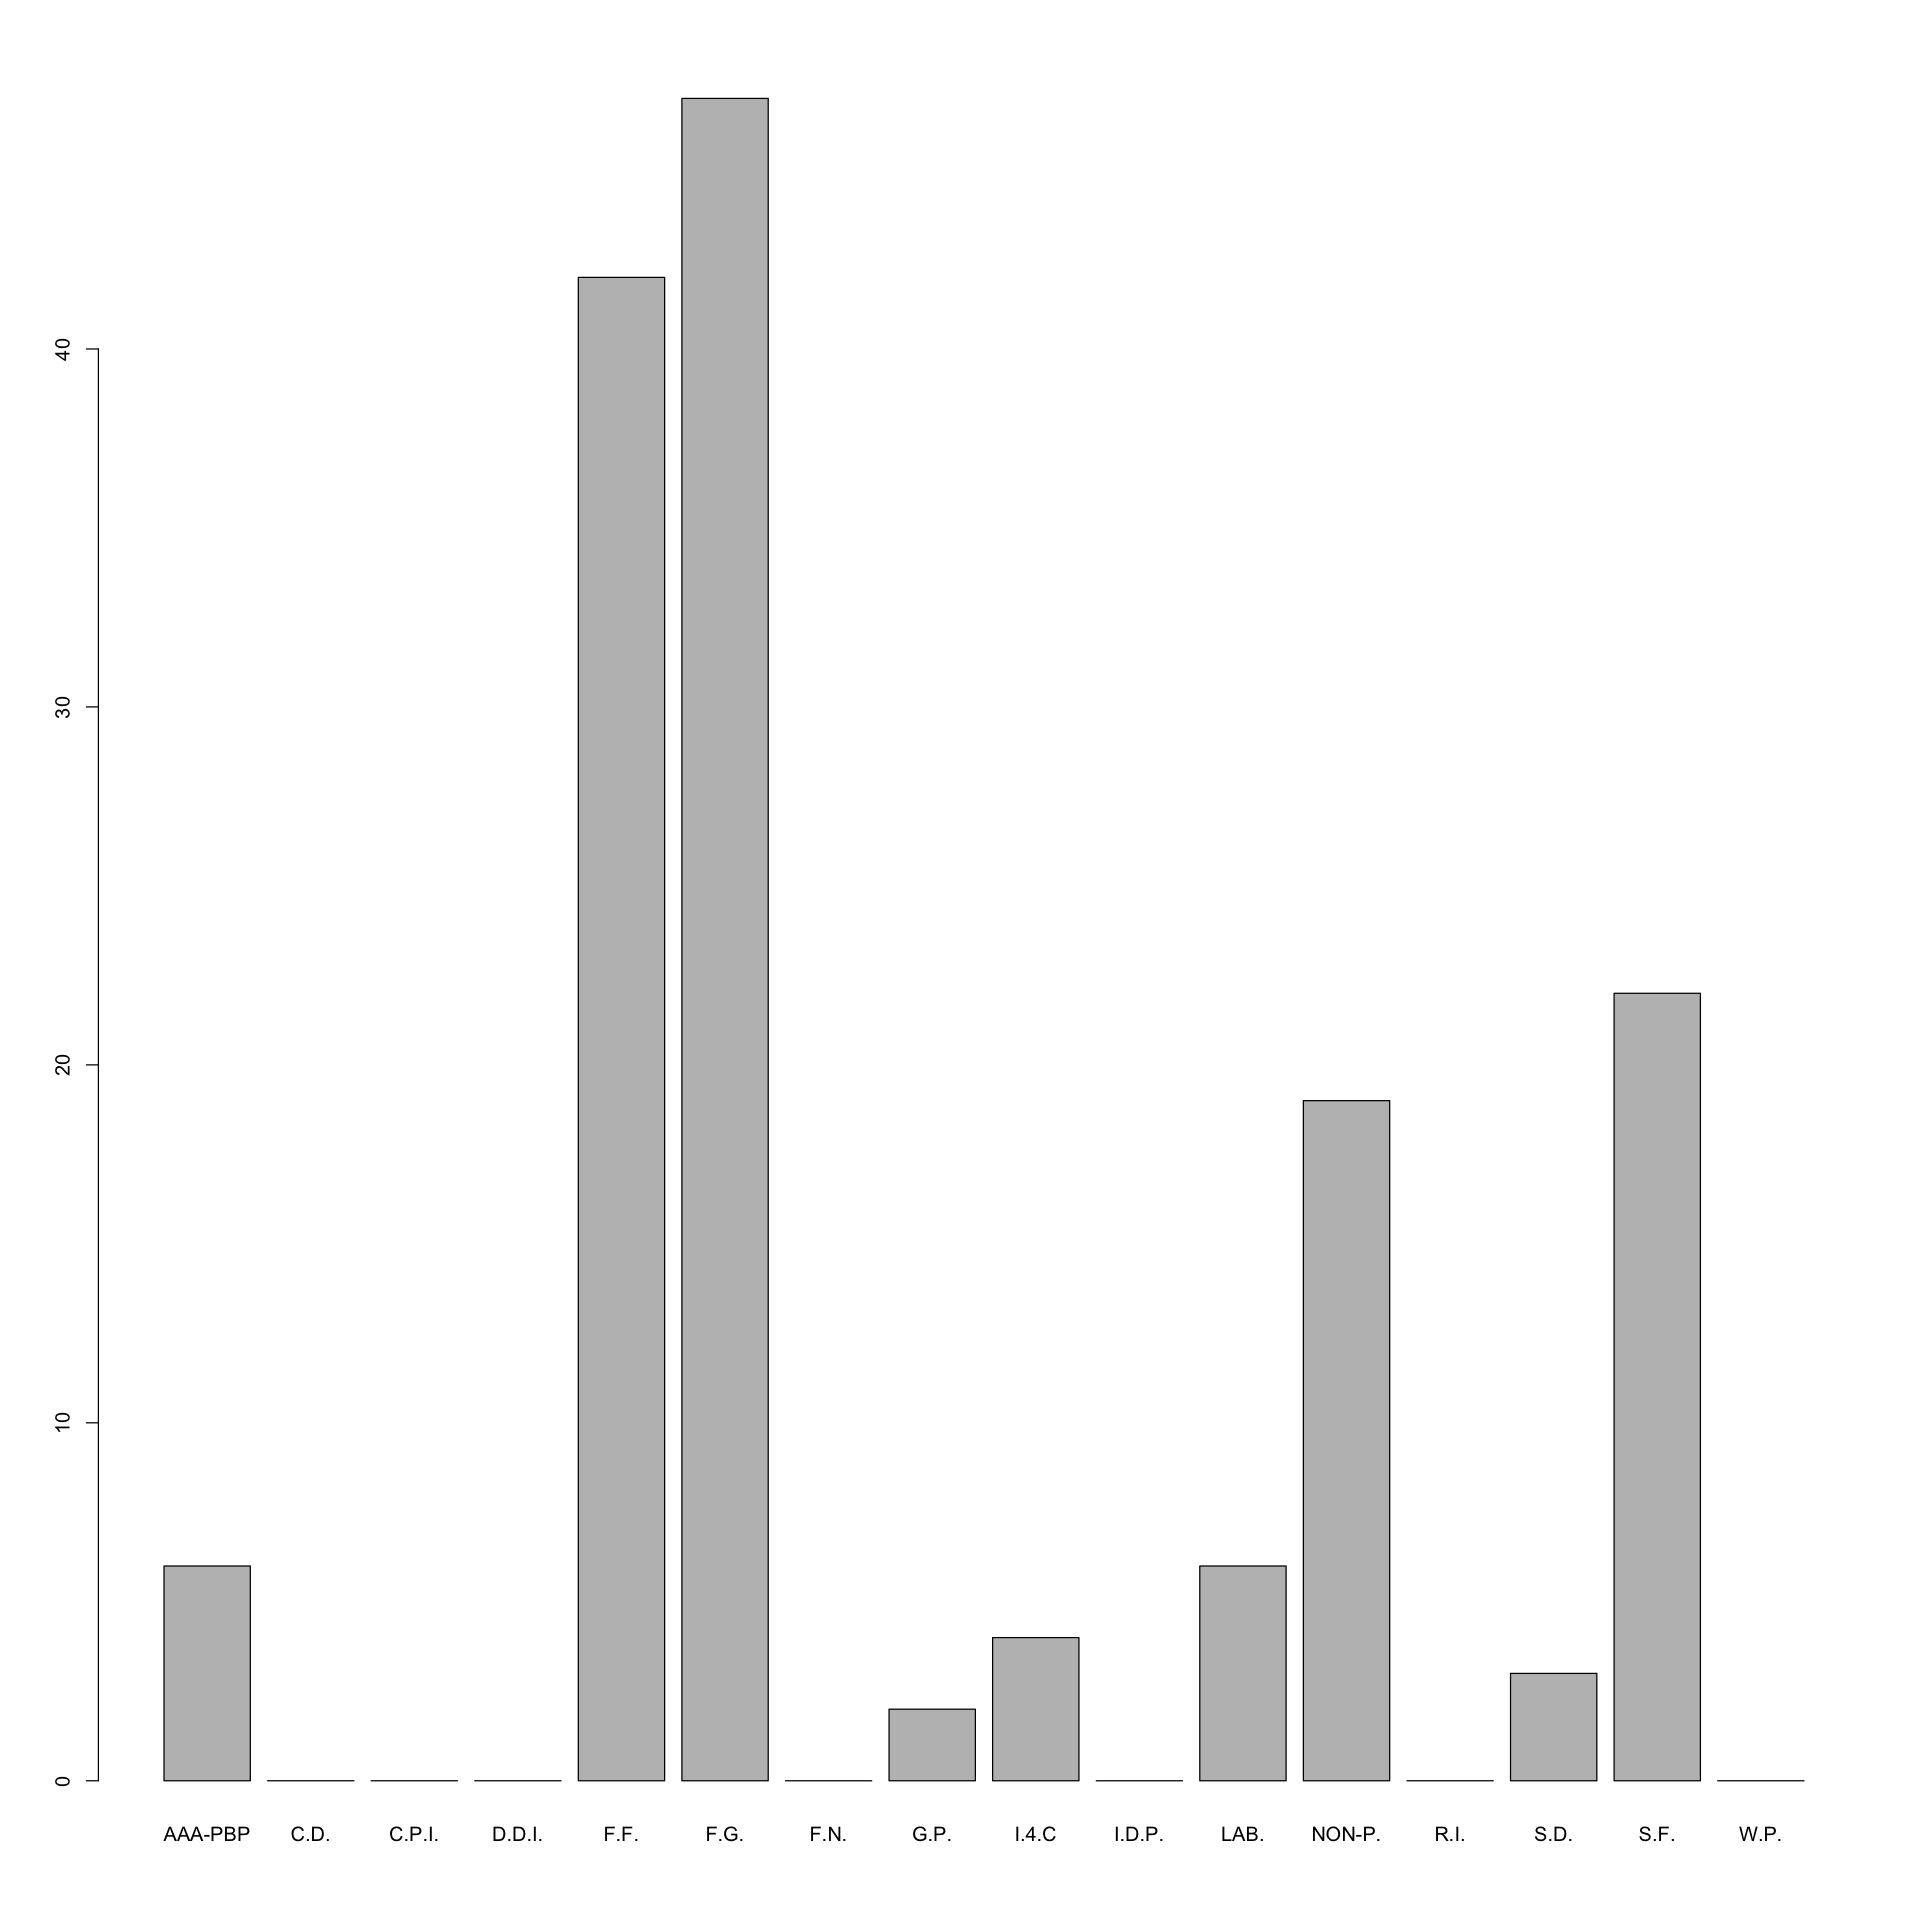

In [296]:
electedCandidateAll <- filter(mergedDF, Result == "Elected")
    
electedCandidateAll <- subset(electedCandidateAll, select = c("Candidate.First.Name", "Candidate.surname", "Constituency.Name", "Gender", "Party", "Party.Abbreviation"))
options(repr.plot.width=16, repr.plot.height=16)
plot(electedCandidateAll$Party.Abbreviation)    